# --- ANÁLISIS DEL IMPACTO DEL CAMBIO CLIMÁTICO EN LA PRODUCCIÓN AGRÍCOLA ---
#### (El dataset utilizado es un dataset de prueba preparado con fines de ejericio de machine learning)

#### I) OBJETIVO
Realizar predicción de la producción agrícola en distintos países.

#### II) ANTECEDENTES
Se tiene un dataset (de prueba) que contiene información sobre la producción agrícola de varios países y los factores climáticos que afectan a la producción agrícola.

#### III) PLAN
1) Carga y Análisis exploratorio de datos
2) Preprocesamiento de datos
3) Modelado y evaluación de modelos
4) Analisis de resultados y Conclusiones


------------------------------

## 1.- CARGA Y ANALISIS EXPLORATORIO DE DATOS

### 1.1.- CARGA DATOS

In [1]:
import numpy as np
import pandas as pd 
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
# carga del dataset

df = pd.read_csv("C:/Users/JoséDelCampo/OneDrive - rmesanalytics.com/Documentos/GITHUB-JIDC-DATASCIENCE/JoseDelCampo-Portfolio/dataset_prueba_cambio_climatico_agricultura.csv")
df.head()

,País,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos
0,Alemania,10.5,-5,2,950000
1,Argentina,17.8,-10,5,650000
2,Australia,22.3,-15,8,400000
3,Brasil,25.1,-8,6,900000
4,Canadá,6.2,-2,1,850000


### 1.2.- ANALISIS EXPLORATORIO DE DATOS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   País                  23 non-null     object 
 1   Temperatura_promedio  23 non-null     float64
 2   Cambio_lluvias        23 non-null     int64  
 3   Frecuencia_sequías    23 non-null     int64  
 4   Producción_alimentos  23 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.0+ KB


OBSERVACION 1:

- No hay datos nulos.
- Solo hay 1 variable categorica y es nominal

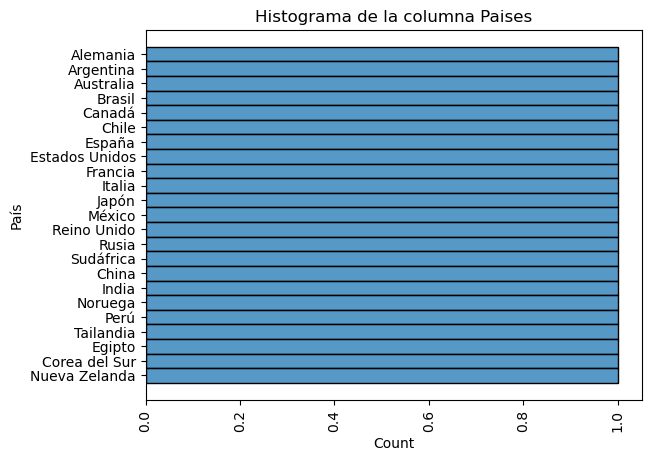

In [4]:
sns.histplot(data=df, y='País')
plt.title('Histograma de la columna Paises')
plt.xticks(rotation=90)
plt.show()

OBSERVACION 2:
- Todos los paises se repiten una sola vez, por lo que podemos eliminar esta fila para el analisis
- Para fines del ejercicio se entenderá como que las variables son independiente del pais

In [5]:
df2 = df.copy()
df2 = df2.drop(columns='País')
df2.head()

,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos
0,10.5,-5,2,950000
1,17.8,-10,5,650000
2,22.3,-15,8,400000
3,25.1,-8,6,900000
4,6.2,-2,1,850000


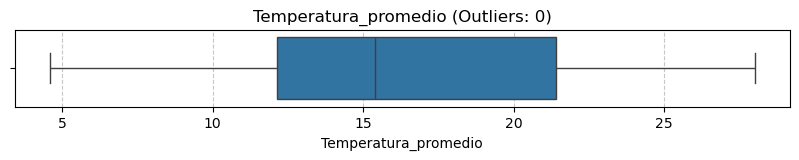

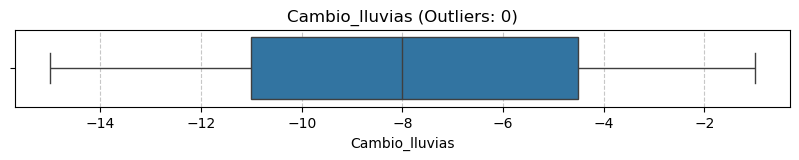

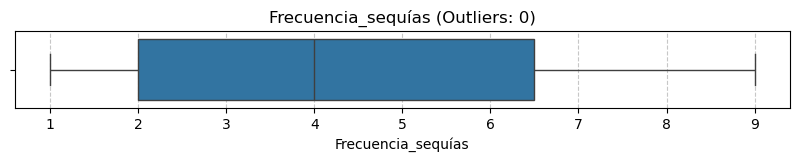

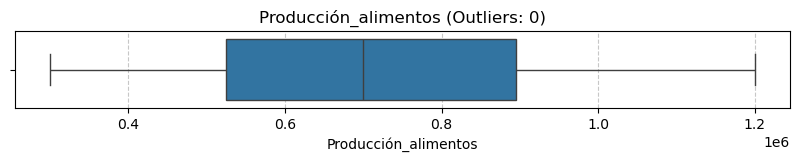

In [6]:
# Explorando outliers

for i in df2.columns:
    # Contador de Outliers
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df2[(df2[i] < lower_limit) | (df2[i] > upper_limit)][i]
    num_outliers = outliers.count()
    
    # Graficar boxplot
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=df2, x=df2[i])
    plt.title(f"{i} (Outliers: {num_outliers})")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

OBSERVACION 3:

- No existen outliers

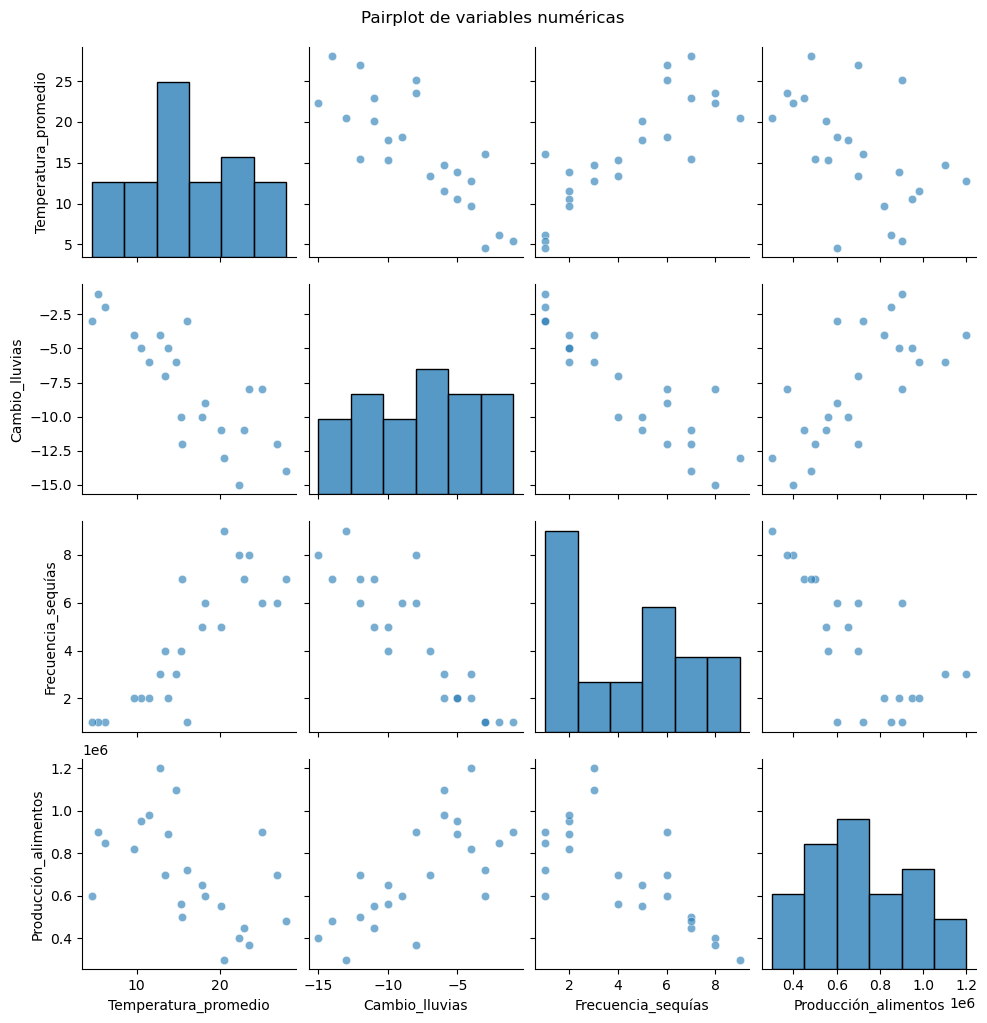

In [7]:
# Filtrar solo columnas numéricas
numeric_cols = df2.select_dtypes(include=['int64', 'float64'])

# Crear pairplot
sns.pairplot(numeric_cols, diag_kind='hist', plot_kws={'alpha':0.6})
plt.suptitle("Pairplot de variables numéricas", y=1.02)
plt.show()

OBSERVACION 4:
- Hay relaciones lineales entre todas las variables

### 1.3.- OBSERVACIONES FINALES EDA:
1) No hay datos nulos.
2) Solo hay 1 variable categorica y es nominal
3) Todos los paises se repiten una sola vez, por lo que podemos eliminar esta fila para el analisis
4) Para fines del ejercicio se entenderá como que las variables son independiente del pais
5) No existen outliers
6) Si se ven tendencias lineales

## 2.- PREPROCESAMIENTO DE DATOS
- Se divide los datos en conjunto de entrenamiento y prueba (80%-20%).
- Se aplican técnicas de normalización o estandarización a las variables numéricas.

In [8]:
# Dividiendo datos de StandardScaler

X = df2.drop('Producción_alimentos', axis=1)
y = df2['Producción_alimentos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=99)

In [9]:
# Normalizando variables independientes

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.- MODELADO Y EVALUACIÓN DE MODELOS
- REGRESIÓN
- CLASIFICACIÓN

### 3.1.- REGRESIÓN

#### 3.1.1.- ENTRENAMIENTO

In [10]:
# REGRESION LINEAL

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# ARBOL DE DESICIONES

adr = DecisionTreeRegressor(max_depth=10, min_samples_split=10,random_state=99)
adr.fit(X_train, y_train) 
y_pred_adr = adr.predict(X_test)

# RANDOM FOREST

rfr = RandomForestRegressor(n_estimators=100,max_depth=7,min_samples_leaf=3,random_state=99,n_jobs=-1)
rfr.fit(X_train, y_train)  
y_pred_rfr = rfr.predict(X_test)

#### 3.1.2.- EVALUACIÓN DE MODELOS

In [11]:
print('REGRESIÓN LINEAL - StandardScaler')
mae_lr2 = mean_absolute_error(y_test, y_pred_lr)
mse_lr2 = mean_squared_error(y_test, y_pred_lr)
r2_lr2 = r2_score(y_test, y_pred_lr)
print(f" -MAE: {mae_lr2} \n -MSE: {mse_lr2} \n -R2: {r2_lr2}")

print('-'*50)
print('ARBOL DE DESICIONES - Sin normalizar')
mae_adc = mean_absolute_error(y_test, y_pred_adr)
mse_lr = mean_squared_error(y_test, y_pred_adr)
r2_adc = r2_score(y_test, y_pred_adr)
print(f" -MAE: {mae_adc} \n -MSE: {mse_lr} \n -R2: {r2_adc}")

print('-'*50)
print('RANDOM FOREST - Sin normalizar')
mae_rfr3 = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr3 = mean_squared_error(y_test, y_pred_rfr)
r2_rfr3 = r2_score(y_test, y_pred_rfr)
print(f" -MAE: {mae_rfr3} \n -MSE: {mse_rfr3} \n -R2: {r2_rfr3}")

REGRESIÓN LINEAL - StandardScaler
 -MAE: 140653.73457115557 
 -MSE: 27001472637.568157 
 -R2: 0.5900420163128848
--------------------------------------------------
ARBOL DE DESICIONES - Sin normalizar
 -MAE: 107000.0 
 -MSE: 21262500000.0 
 -R2: 0.6771756953722823
--------------------------------------------------
RANDOM FOREST - Sin normalizar
 -MAE: 110664.50865800868 
 -MSE: 19172837498.750195 
 -R2: 0.7089026251252551


### 3.2.- CLASIFICACIÓN
Nota: Se creará una nueva variable categórica que clasifique los países en "Bajo", "Medio" y "Alto" impacto climático en la producción agrícola.

#### 3.2.1.- PREPARANDO VARIABLE CATEGORICA DE IMPACTO CLIMATICO
Evaluación vía:
- K-Means
- Hierarchical Clustering

##### 3.2.1.1.- EVALUACIÓN

c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _wina

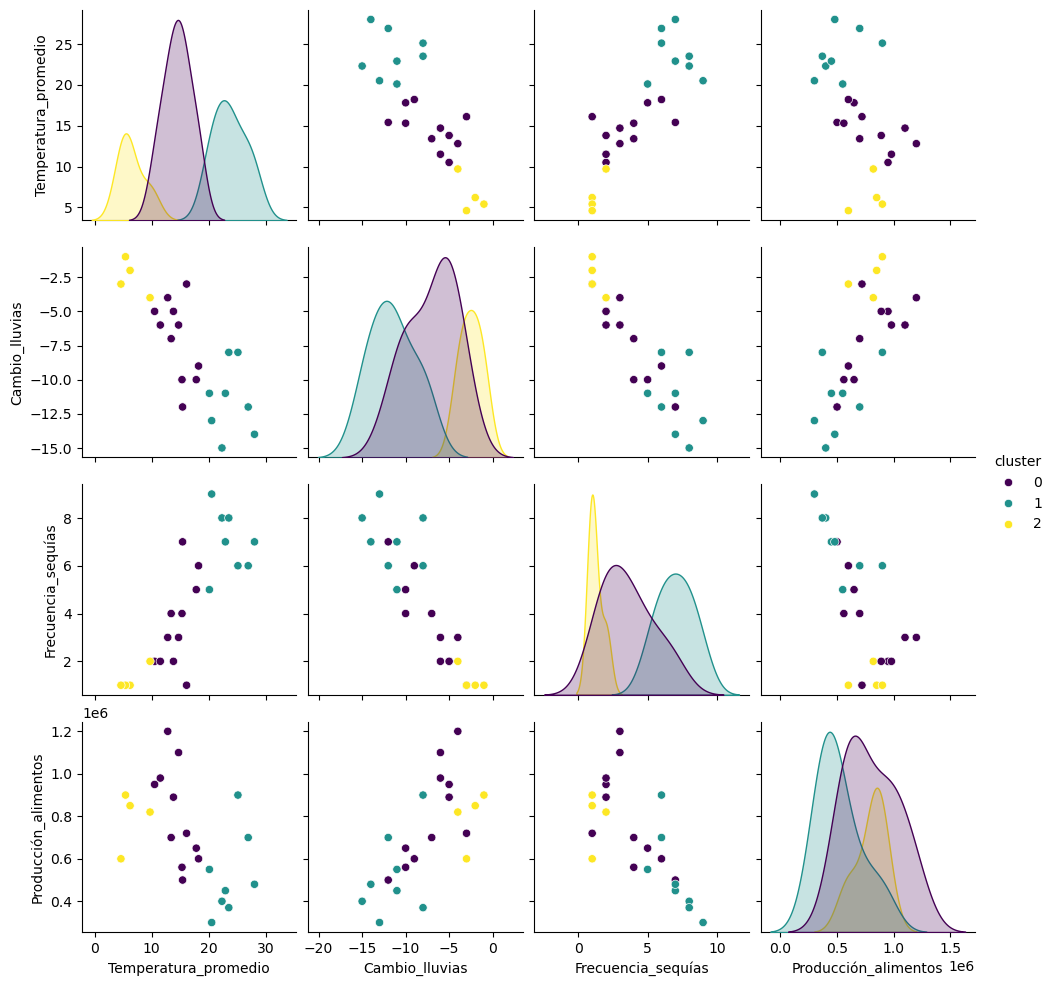

In [12]:
# Cluster via K-Means:


# ota: justar modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=99)
kmeans.fit(X)

# Añadir etiquetas al DataFrame original
df2['cluster'] = kmeans.labels_

# Visualizar (con seaborn pairplot)
sns.pairplot(df2, hue='cluster', palette='viridis')
plt.show()

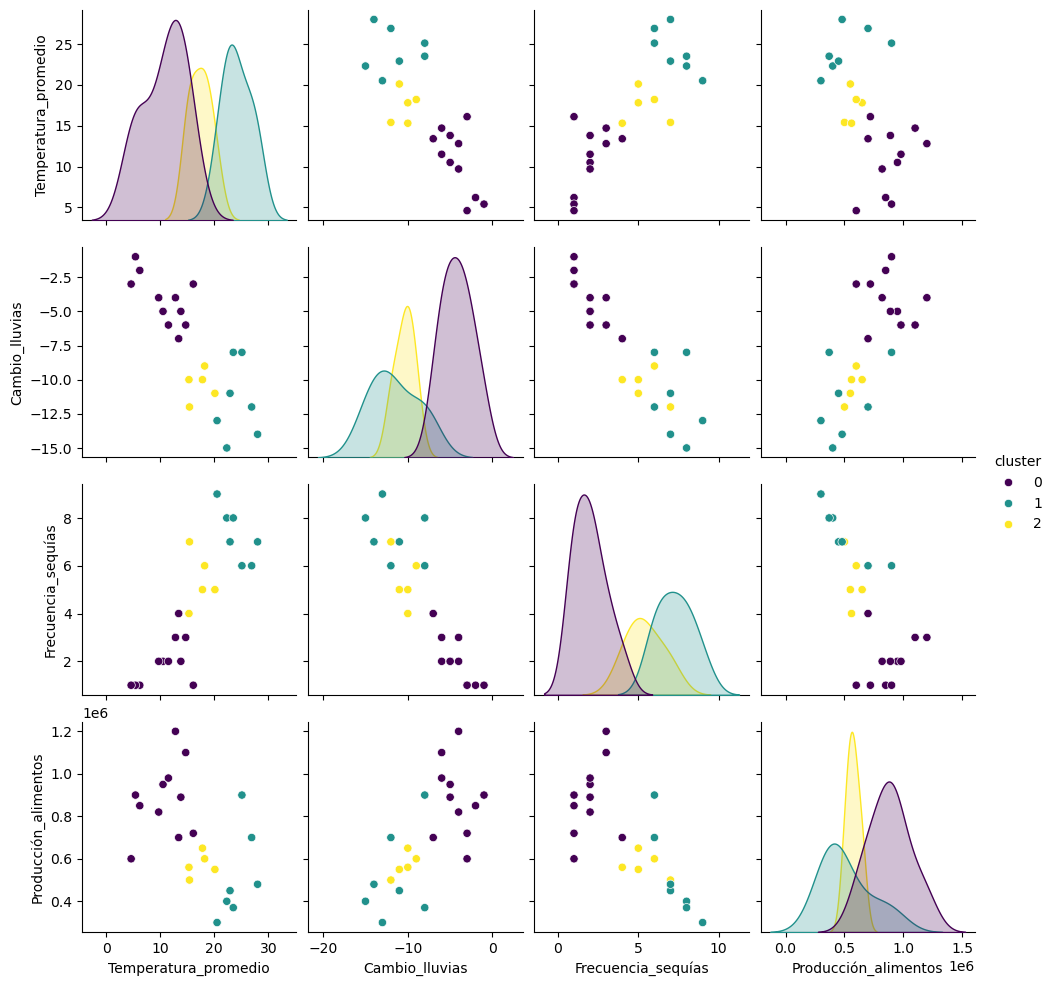

In [13]:
# Cluster via Hierarchical Clustering:


# Ajustar modelo Hierarchical Clustering
model_HC = AgglomerativeClustering(n_clusters=3)
labels = model_HC.fit_predict(X)

# Añadir etiquetas al DataFrame original
df2['cluster'] = model_HC.labels_

# Visualizar (con seaborn pairplot)
sns.pairplot(df2, hue='cluster', palette='viridis')
plt.show()

CONCLUSION:
- De los 2 modelos K-Means y clusterización jerárquica, la segunda da una segmentación mas clara para la variable Producción de alimentos, por lo que se entenderá a "1 como Bajo", "2 como Medio" y "0 como Alto"

##### 3.2.1.2.- TRANSFORMACIÓN DE DATOS

In [14]:
df2.head()

,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos,cluster
0,10.5,-5,2,950000,0
1,17.8,-10,5,650000,2
2,22.3,-15,8,400000,1
3,25.1,-8,6,900000,1
4,6.2,-2,1,850000,0


In [15]:
df2['cluster'] = df2['cluster'].replace({
    0: 'Alto',
    1: 'Bajo',
    2: 'Medio'
})
df2.head()

,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos,cluster
0,10.5,-5,2,950000,Alto
1,17.8,-10,5,650000,Medio
2,22.3,-15,8,400000,Bajo
3,25.1,-8,6,900000,Bajo
4,6.2,-2,1,850000,Alto


#### 3.2.2.- PREPARACIÓN DE DATOS PARA MACHINE LEARNING

In [16]:
# SEPARANDO DATOS

X2 = df2.drop('cluster', axis=1)
y2 = df2['cluster']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,random_state=11)

In [17]:
# ESCALAMIENTO VIA STANDARD SCALER

scaler2 = StandardScaler()
X2_train_sca = scaler2.fit_transform(X2_train)
X2_test_sca = scaler2.transform(X2_test)

#### 3.2.3.- ENTRENAMIENTO DE MODELOS

In [18]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X2_train_sca, y2_train)
y_pred_knn = knn.predict(X2_test_sca)

# ARBOL DE DESICIONES
tree = DecisionTreeClassifier(criterion='gini', random_state=99)
tree.fit(X2_train_sca, y2_train)
y_pred_adc = tree.predict(X2_test_sca)

# SVM

svm = SVC(kernel='rbf', probability=True)
svm.fit(X2_train_sca, y2_train)
y_pred_svm = svm.predict(X2_test_sca)

#### 3.2.4.- EVALUACIÓN DE MODELOS

a) KNN

KNN



Accuracy: 1.0
Precisión: 1.0
Recall: 1.0
F1-score: 1.0


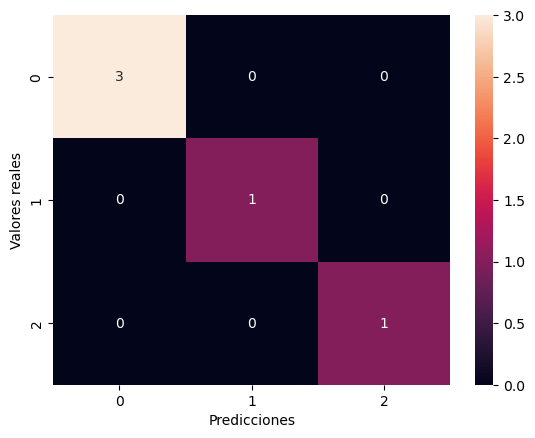

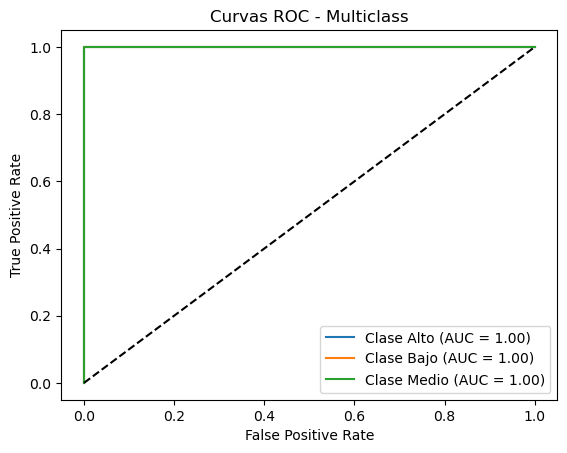

In [19]:
# KNN
print('KNN')
print('='*50, '\n\n\n')


accuracy_knn = accuracy_score(y2_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn}')
precision_knn = precision_score(y2_test, y_pred_knn, average='macro')
print(f'Precisión: {precision_knn}')
recall_knn = recall_score(y2_test, y_pred_knn, average='macro')
print(f'Recall: {recall_knn}')
f1_knn = f1_score(y2_test, y_pred_knn, average='macro')
print(f'F1-score: {f1_knn}')

# MATRIZ DE CONFUSION

conf_matrix = confusion_matrix(y2_test, y_pred_knn)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

# CURVA ROC

classes = np.unique(y2_test)
y_test_bin = label_binarize(y2_test, classes=classes)

# Probabilidades
y_prob = knn.predict_proba(X2_test_sca)

# Curvas por clase
plt.figure()
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {class_label} (AUC = {roc_auc:.2f})')

# Formato gráfico
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC - Multiclass")
plt.legend()
plt.show()

b) ARBOL DE DESICIONES

ARBOL DE DESICION



Accuracy: 0.6
Precisión: 0.7777777777777778
Recall: 0.7777777777777777
F1-score: 0.6666666666666666


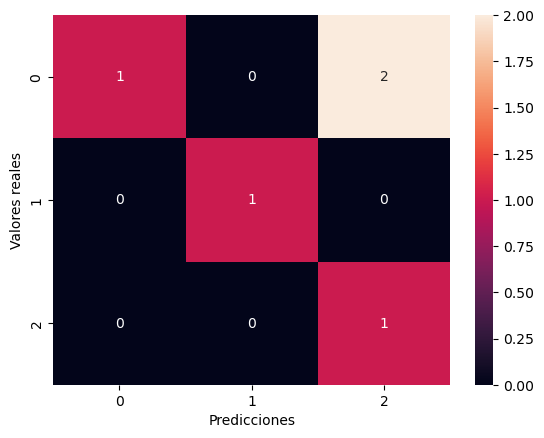

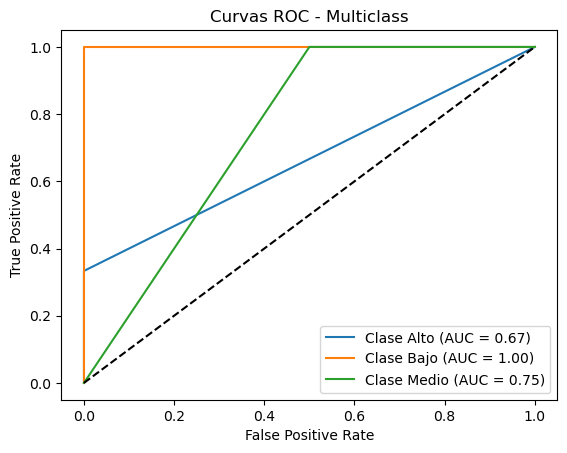

In [20]:
# ARBOL DE DESICIONES
print('ARBOL DE DESICION')
print('='*50, '\n\n\n')


accuracy_tree = accuracy_score(y2_test, y_pred_adc)
print(f'Accuracy: {accuracy_tree}')
precision_tree = precision_score(y2_test, y_pred_adc, average='macro')
print(f'Precisión: {precision_tree}')
recall_tree = recall_score(y2_test, y_pred_adc, average='macro')
print(f'Recall: {recall_tree}')
f1_tree = f1_score(y2_test, y_pred_adc, average='macro')
print(f'F1-score: {f1_tree}')

# MATRIZ DE CONFUSION

conf_matrix_tree = confusion_matrix(y2_test, y_pred_adc)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

# CURVA ROC

classes_tree = np.unique(y2_test)
y_test_bin_tree = label_binarize(y2_test, classes=classes_tree)

# Probabilidades
y_prob_tree = tree.predict_proba(X2_test_sca)

# Curvas por clase
plt.figure()
for i, class_label in enumerate(classes_tree):
    fpr, tpr, _ = roc_curve(y_test_bin_tree[:, i], y_prob_tree[:, i])
    roc_auc_tree = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {class_label} (AUC = {roc_auc_tree:.2f})')

# Formato gráfico
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC - Multiclass")
plt.legend()
plt.show()

c) SVM

SVM



Accuracy: 1.0
Precisión: 1.0
Recall: 1.0
F1-score: 1.0


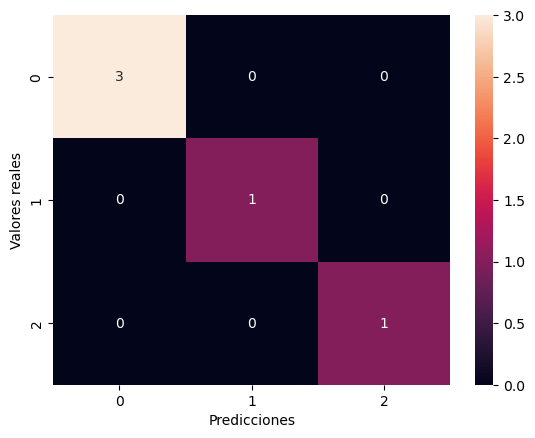

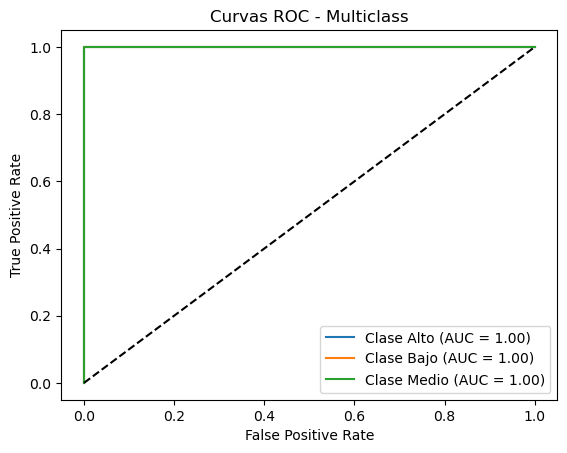

In [21]:
# SVM
print('SVM')
print('='*50, '\n\n\n')


accuracy_svm = accuracy_score(y2_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm}')
precision_svm = precision_score(y2_test, y_pred_svm, average='macro')
print(f'Precisión: {precision_svm}')
recall_svm = recall_score(y2_test, y_pred_svm, average='macro')
print(f'Recall: {recall_svm}')
f1_svm = f1_score(y2_test, y_pred_svm, average='macro')
print(f'F1-score: {f1_svm}')

# MATRIZ DE CONFUSION

conf_matrix_svm = confusion_matrix(y2_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

# CURVA ROC

classes_svm = np.unique(y2_test)
y_test_bin_svm = label_binarize(y2_test, classes=classes_svm)

# Probabilidades
y_prob_svm = svm.predict_proba(X2_test_sca)

# Curvas por clase
plt.figure()
for i, class_label in enumerate(classes_svm):
    fpr, tpr, _ = roc_curve(y_test_bin_svm[:, i], y_prob_svm[:, i])
    roc_auc_svm = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {class_label} (AUC = {roc_auc_svm:.2f})')

# Formato gráfico
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC - Multiclass")
plt.legend()
plt.show()

OBSERVACION:
- Tanto KNN como SVM tienen un ajuste perfecto en la predicción.

#### 3.2.5.- OPTIMIZACIÓN DE MODELOS
- Se ajustan los hiperparámetros utilizando validación cruzada y búsqueda en grilla.
- Se Aplican técnicas de regularización y analiza su impacto en los modelos.


##### 3.2.5.1.- AJUSTE DE HIPERPARAMETROS CON GRIDSEARCHCV

##### 3.2.5.1.1.- APLICACIÓN GRIDSEARCHCV EN ENTRENAMIENTO

a) SVM

In [22]:
# Punto 1: Ajuste de hiperparametros

# SVM

# Definir modelo base
svm2 = SVC(probability=True)

# Definir grilla de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10],            # Controla regularización
    'kernel': ['linear', 'rbf'],  # Tipo de kernel
    'gamma': ['scale', 0.01, 0.1] # Solo para kernel RBF
}

# Configurar búsqueda con validación cruzada
grid_search_svm = GridSearchCV(
    estimator=svm2,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=4,               
    n_jobs=-1,           
    verbose=2
)

# Entrenar
grid_search_svm.fit(X2_train_sca, y2_train)

# Resultados
print("Mejores parámetros:", grid_search_svm.best_params_)
print("Mejor puntaje en CV:", grid_search_svm.best_score_)

# Modelo óptimo
best_model_svm = grid_search_svm.best_estimator_

Fitting 4 folds for each of 18 candidates, totalling 72 fits
Mejores parámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Mejor puntaje en CV: 0.95


b) ARBOL DE DESICIONES

In [23]:
# ARBOL DE DESICIONES

# Definir el espacio de búsqueda de hiperparámetros
param_grid_tree = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Función de división
    'max_depth': [None, 3, 5, 10],                 # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],               # Mínimo de muestras para dividir
    'min_samples_leaf': [1, 2, 4],                 # Mínimo de muestras en hojas
    'max_features': [None, 'sqrt', 'log2']         # Número máximo de características a considerar
}

# Configurar GridSearchCV
grid_search_tree = GridSearchCV(
    estimator=tree,
    param_grid=param_grid_tree,
    scoring='accuracy',  # Métrica de evaluación
    cv=4,                # Validación cruzada
    n_jobs=-1,           # Usar todos los núcleos disponibles
    verbose=1            # Mostrar progreso
)

# Entrenar con búsqueda de hiperparámetros
grid_search_tree.fit(X2_train_sca, y2_train)

# Mostrar mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search_tree.best_params_)

# Modelo óptimo
best_model_tree = grid_search_tree.best_estimator_

Fitting 4 folds for each of 324 candidates, totalling 1296 fits
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


c) KNN

In [24]:
# KNN

# Definir el espacio de búsqueda de hiperparámetros
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],     # Número de vecinos
    'weights': ['uniform', 'distance'],  # Ponderación de vecinos
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distancia
    'p': [1, 2]  # Parámetro de Minkowski (1 = Manhattan, 2 = Euclidiana)
}

# Configurar GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    scoring='accuracy',  # Métrica a optimizar
    cv=4,                # Validación cruzada (ajusta según tu dataset)
    n_jobs=-1,           # Usa todos los núcleos disponibles
    verbose=1
)

# Entrenar con búsqueda de hiperparámetros
grid_search_knn.fit(X2_train_sca, y2_train)

# Mostrar mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search_knn.best_params_)

# Evaluar el modelo óptimo
best_model_knn = grid_search_knn.best_estimator_

Fitting 4 folds for each of 60 candidates, totalling 240 fits
Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [0.95   0.95   0.95   0.95   0.95   0.95   0.95   0.95   0.8375 0.95
 0.8375 0.95   0.775  1.     0.775  1.     0.575  1.     0.575  1.
 0.95   0.95   0.95   0.95   0.95   0.95   0.95   0.95      nan 0.95
    nan 0.95      nan 1.        nan 1.        nan 1.        nan 1.
 0.95   0.95   0.95   0.95   0.95   0.95   0.95   0.95      nan 0.95
 0.8375 0.95      nan 1.     0.775  1.        nan 1.     0.575  1.    ]
  warnings.warn(


##### 5.2.5.1.2.- EVALUACIÓN DE MODELOS

In [25]:
# Evaluacion de mejores modelos por GridSearchCV

# KNN

y_pred_best_knn = best_model_knn.predict(X2_test_sca)
print(f"Accuracy en test: {accuracy_score(y2_test, y_pred_best_knn):.4f}")
print("\nReporte de clasificación:")
print(classification_report(y2_test, y_pred_best_knn))

# ARBOL DE DESICIONES

y_pred_best_tree = best_model_tree.predict(X2_test_sca)
print(f"Accuracy en test: {accuracy_score(y2_test, y_pred_best_tree):.4f}")
print("\nReporte de clasificación:")
print(classification_report(y2_test, y_pred_best_tree))

# SVM

y_pred_best_svm = best_model_svm.predict(X2_test_sca)
print(f"Accuracy en test: {accuracy_score(y2_test, y_pred_best_svm):.4f}")
print("\nReporte de clasificación:")
print(classification_report(y2_test, y_pred_best_svm))

Accuracy en test: 1.0000

Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00         3
        Bajo       1.00      1.00      1.00         1
       Medio       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Accuracy en test: 0.6000

Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       1.00      0.33      0.50         3
        Bajo       1.00      1.00      1.00         1
       Medio       0.33      1.00      0.50         1

    accuracy                           0.60         5
   macro avg       0.78      0.78      0.67         5
weighted avg       0.87      0.60      0.60         5

Accuracy en test: 1.0000

Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       1.00    

## 4.- ANÁLISIS DE LOS RESULTADOS Y CONCLUSIONES

### 4.1.- COMPARACIÓN MODELOS DE REGRESIÓN: 
En un analisis de tipo media y varianza podemos observar que Random Forest es el modelo mas adecuado. 
1) MAE (Menos es mejor): Arbol de desiciones es mejor, ya que al tomar en cuenta el error absoluto de cada dato se puede interpretar como que tanto se ha equivocado mi modelo.
- Regresión Lineal: 140653.7
- Arbol de desicion: 107000.0 --> Es el modelo que menos se equivoco en promedio en cada uno de sus puntos.
- Random Forest: 110664.5
2) MSE (Menos es mejor): Random Forest es mejor, ya que su valor es menor y esta metrica logra sensibilizar mas las diferencias al multiplicarlas al cuadrado, lo que al igual que MAE tambien habla sobre que tanto se ha equivocado mi modelo.
- Regresión Lineal: 27001472637.5
- Arbol de desición: 21262500000.0
- Random Forest: 19172837498.8 --> Es el mejor modelo, al hacer este indicador mas sensible podemos darnos cuenta que Random Forest es un modelo que se comporta mejor que el resto.
3) R2 (Mas es mejor): Random Forest es mejor ya que explica las varianzas complementando a los indicadores previos, al ser el mayor se entiende que es el modelo que mejor se ajusta a los datos.
- Regresión Lineal: 0.5900
- Arbol de desición: 0.6772
- Random Forest: 0.7089 --> Es el modelo con mejor ajuste de los 3.

### 4.2.- COMPARACIÓN MODELOS DE CLASIFICACIÓN:
De los 3 modelos los que mejor se ajustan para predicción son los KNN y SVM logrando un nivel de 1.0

1) KNN: Modelo se ajusta perfecto a los datos, incluso luego de optimizar los hiperparametros, lo que puede indicar un sobreajuste y perdida de generalización o el uso de un modelo muy complejo para este tipo de datos

- Accuracy: 1.0     --> 1.0
- Precisión: 1.0    --> 1.0
- Recall: 1.0       --> 1.0
- F1-score: 1.0     --> 1.0

2) ARBOL DE DESICION: Modelo tiene un ajuste bajo, en este caso el arbol de desicion no es el mejor modelo ya que no mejora ni siquiera con una optimizacion, posiblemente haya que hacer un ajuste mas fino y aplicar tecnicas avanzadas para subir algunos puntos en su capacidad.

- Accuracy: 0.6     --> 0.6
- Precisión: 0.777  --> 0.78
- Recall: 0.777     --> 0.78
- F1-score: 0.666   --> 0.67

3) SVM: Modelo se ajusta perfecto a los datos, incluso luego de optimizar los hiperparametros, lo que puede indicar un sobreajuste y perdida de generalización o el uso de un modelo muy complejo para este tipo de datos

- Accuracy: 1.0     --> 1.0
- Precisión: 1.0    --> 1.0
- Recall: 1.0       --> 1.0
- F1-score: 1.0     --> 1.0

### 4.3.- CONCLUSION:
- Para el caso de la regresion contamos con un modelo (Random Forest) con un buen nivel de predicción en cuando se obtengan datos mas alla que el entrenamiento.
- Para el caso de la clasificación podemos notar que nuestros modelos pueden detectar de buena manera si un pais/zona dadas sus caracteristicas tiene un nivel alto, medio o bajo de producción, por lo que se necesitan solo nuevos datos que vayan mas alla de los de entrenamiento.